In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
# Get unit4 data as df

In [3]:
data = pd.read_csv (r'unit4.csv') # import file

In [4]:
data

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,...,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,...,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,...,,113,43,10,25,9702,L2F,37,14.0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,,4803,XXXX,,F,S2,6.0,H,733,...,,59,23,5,12,9702,L4D,24,3.0,3.375000
90565,AK,,0,XXXX,,M,C2,NaN,,988,...,,14,6,5,12,9702,L1G,1,NaN,25.000000
90566,TX,,5001,XXXX,,M,C1,7.0,H,1679,...,,10,4,3,8,9702,L1F,1,NaN,20.000000
90567,MI,,3801,XXXX,X,M,C3,NaN,,376,...,,33,14,7,17,9702,L3E,7,3.0,8.285714


## split the data into numericals and categoricals for EDA

In [5]:
data.columns

Index(['STATE', 'PVASTATE', 'DOB', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN',
       'INCOME', 'HOMEOWNR', 'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3',
       'IC4', 'IC5', 'VETERANS', 'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12',
       'MAXADATE', 'RFA_2', 'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [7]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

## data quality check

In [8]:
data.duplicated().sum() # count duplicates

1

In [9]:
data[data.duplicated(keep=False)] # see duplicates

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
36109,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0
49464,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0


In [10]:
data = data.drop_duplicates()# drop duplicate and replaces the data frame

## after deleting a row, reset index

In [11]:
data.reset_index(drop=True, inplace=True)

# see all columns, EDA on numerical

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [14]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

In [15]:
d_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90568 entries, 0 to 90567
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DOB       90568 non-null  int64  
 1   INCOME    70386 non-null  float64
 2   HV1       90568 non-null  int64  
 3   HV2       90568 non-null  int64  
 4   HV3       90568 non-null  int64  
 5   HV4       90568 non-null  int64  
 6   IC1       90568 non-null  int64  
 7   IC2       90568 non-null  int64  
 8   IC3       90568 non-null  int64  
 9   IC4       90568 non-null  int64  
 10  IC5       90568 non-null  int64  
 11  NUMPROM   90568 non-null  int64  
 12  CARDPROM  90568 non-null  int64  
 13  CARDPM12  90568 non-null  int64  
 14  NUMPRM12  90568 non-null  int64  
 15  MAXADATE  90568 non-null  int64  
 16  NGIFTALL  90568 non-null  int64  
 17  TIMELAG   80916 non-null  float64
 18  AVGGIFT   90568 non-null  float64
dtypes: float64(3), int64(16)
memory usage: 13.1 MB


### create a nulls data frame which summarises % of nulls per column

In [16]:
nulls=pd.DataFrame(d_num.isna().sum()/len(d_num))

In [17]:
nulls.reset_index(inplace=True)

In [18]:
nulls.columns=['column_name', 'percentage_nulls']
nulls.sort_values(by='percentage_nulls', ascending=False)
# this is your data quality snapshot

,column_name,percentage_nulls
1,INCOME,0.222838
17,TIMELAG,0.106572
0,DOB,0.000000
10,IC5,0.000000
16,NGIFTALL,0.000000
15,MAXADATE,0.000000
14,NUMPRM12,0.000000
13,CARDPM12,0.000000
12,CARDPROM,0.000000
11,NUMPROM,0.000000


# fill in nulls
- with a fixed value
- with interpolation

In [19]:
median_d=d_num['INCOME']. fillna(d_num['INCOME'].median())

In [20]:
median_d.head(10)

0    4.0
1    6.0
2    3.0
3    1.0
4    3.0
5    4.0
6    4.0
7    2.0
8    3.0
9    4.0
Name: INCOME, dtype: float64

<AxesSubplot:>

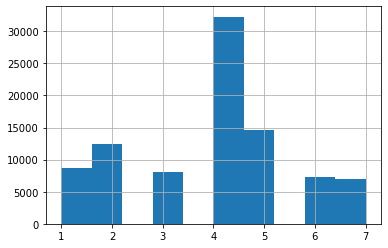

In [21]:
median_d.hist()

In [22]:
zeros_d=d_num['INCOME']. fillna(0)

In [23]:
zeros_d

0        0.0
1        6.0
2        3.0
3        1.0
4        3.0
        ... 
90563    6.0
90564    0.0
90565    7.0
90566    0.0
90567    5.0
Name: INCOME, Length: 90568, dtype: float64

<AxesSubplot:>

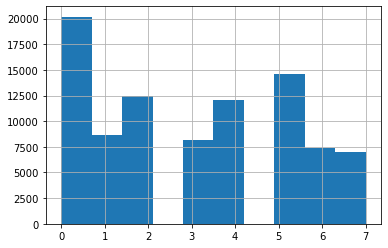

In [24]:
zeros_d.hist()

## after picking your method, apply to your dataframe

In [25]:
d_num['INCOME']=d_num['INCOME'].fillna(0)

In [26]:
d_num['TIMELAG'].describe()

count    80916.000000
mean         8.114378
std          8.310877
min          0.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       1088.000000
Name: TIMELAG, dtype: float64

<AxesSubplot:xlabel='TIMELAG', ylabel='AVGGIFT'>

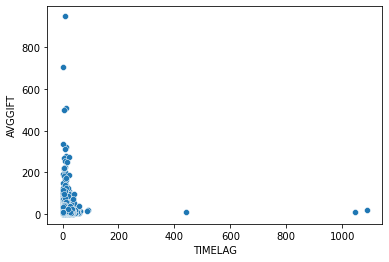

In [27]:
sns.scatterplot(data=d_num, x="TIMELAG", y="AVGGIFT")

In [28]:
# removing outliers then scatter plot again
- IQR
- upper limit
- exclude anything over upper limit
OR FILTER BY A FIXED LIMIT

SyntaxError: invalid syntax (88476338.py, line 3)

In [29]:
# pd.cut or pd.qcut
# OR create a function to bucket values

## correlation

In [ ]:
- correlation matrix
- joint  plot
- pair plot
- scatter plot
- box plot

# nulls on cat df

In [30]:
d_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90568 entries, 0 to 90567
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     90568 non-null  object
 1   PVASTATE  90568 non-null  object
 2   MDMAUD    90568 non-null  object
 3   RECP3     90568 non-null  object
 4   GENDER    90568 non-null  object
 5   DOMAIN    90568 non-null  object
 6   HOMEOWNR  90568 non-null  object
 7   VETERANS  90568 non-null  object
 8   RFA_2     90568 non-null  object
dtypes: object(9)
memory usage: 6.2+ MB


# common things to check
- blanks and nulls and any other weird values
- relevance - from the cat to the target
- chi squared test
- cardinality (how many diff values are in that column, are theresome small ones which can be grouped)

In [31]:
d_cat['MDMAUD'].unique()

array(['XXXX', 'C1CM', 'D1CM', 'L1CM', 'C2CM', 'D2CM', 'I1CM', 'I2MM',
       'I1LM', 'L2CM', 'C1MM', 'C1LM', 'D5CM', 'I2CM', 'D5TM', 'L1LM',
       'D5MM', 'C2MM', 'I5CM', 'C5CM', 'I5MM', 'C2LM', 'C5MM', 'D2MM',
       'L1MM', 'C5TM', 'L2TM'], dtype=object)

In [32]:
d_cat['MDMAUD'].value_counts()

XXXX    90289
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        3
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [33]:
major=data[(data.MDMAUD != 'XXXX')]

In [34]:
major.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,279.000000,211.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,277.000000,279.000000
mean,2284.824373,4.620853,1560.057348,1659.580645,5.243728,4.799283,419.763441,475.767025,470.770609,522.548387,20949.831541,89.534050,24.068100,6.146953,28.351254,9701.673835,15.236559,8.083032,76.561089
std,1830.291615,1.990057,1308.499175,1301.707619,2.790932,2.623058,234.541067,254.266245,218.951568,231.667766,13169.703884,30.273776,8.152703,1.230568,7.382065,5.448027,16.941328,7.267929,81.977787
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,6.000000,1.000000,6.000000,9611.000000,1.000000,0.000000,8.904762
25%,653.500000,3.000000,677.500000,717.000000,3.000000,3.000000,258.500000,300.500000,314.500000,358.500000,13060.500000,68.000000,18.000000,6.000000,25.000000,9702.000000,7.000000,4.000000,42.635088
50%,2201.000000,5.000000,1125.000000,1235.000000,5.000000,4.000000,358.000000,426.000000,426.000000,487.000000,17408.000000,94.000000,25.000000,6.000000,29.000000,9702.000000,11.000000,6.000000,61.111111
75%,3651.500000,6.000000,1929.500000,2144.500000,6.000000,6.000000,513.000000,558.000000,572.500000,618.000000,24688.000000,113.000000,30.000000,6.000000,33.000000,9702.000000,19.000000,10.000000,87.875000
max,6604.000000,7.000000,5916.000000,5800.000000,13.000000,13.000000,1287.000000,1500.000000,1130.000000,1246.000000,88847.000000,158.000000,41.000000,12.000000,50.000000,9702.000000,237.000000,40.000000,948.500000


In [35]:
d_num['AVGGIFT'].mean()

13.428568110050856

In [36]:
# as the mean of the dataset showing only non xxxx is 76,56 euro and the mean of the complete data set is 13,42
# so we could say that the MDMAUD column can be put to xxxx = small donors and others big donors

In [40]:
def group_mdmaud(x):
    if x == 'XXXX':
        return 'not_major_donor'
    else:
        return 'major_donor'
    
d_cat['MDMAUD']=list(map(group_mdmaud,d_cat['MDMAUD']))

In [41]:
group_mdmaud('XXXX')

'not_major_donor'

In [ ]:
# if i live in CA am i likely to give more or less then when I live in NY
How to establish relevance
- box plot, cat plot with jitter, map
- group by state with mean, median

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
data_avg=data[['STATE','AVGGIFT']]

In [56]:
data_avg

,STATE,AVGGIFT
0,IL,7.741935
1,CA,15.666667
2,NC,7.481481
3,CA,6.812500
4,FL,6.864865
...,...,...
90563,FL,3.375000
90564,AK,25.000000
90565,TX,20.000000
90566,MI,8.285714


In [63]:
data_avg_=data_avg.groupby('STATE').agg({"AVGGIFT": [np.mean, np.median, 'count']})

In [64]:
data_avg_

AVGGIFT                  
            mean     median  count
STATE                             
AA     13.912722  11.750000     15
AE     14.427682  13.750000     14
AK     17.261347  15.000000    275
AL     12.827698  11.250000   1627
AP     13.853691  12.666667     78
AR     12.516960  11.090909    969
AS     30.000000  30.000000      1
AZ     13.729736  11.666667   2278
CA     14.683392  12.531250  16283
CO     13.671403  11.909091   1929
CT     15.738928  11.550000     20
DC     20.000000  20.000000      1
DE     17.300000  11.833333      3
FL     13.272612  11.333333   7959
GA     13.820925  12.315789   3261
GU      8.933862   7.444444      3
HI     15.479504  13.750000    423
IA     12.357655  10.240385   1214
ID     12.595635  10.928571    504
IL     13.599498  11.644958   6124
IN     12.452000  10.888889   2855
KS     12.584702  10.600000   1233
KY     12.451172  10.666667   1542
LA     12.614383  11.400000   1533
MA     13.691318  11.000000     25
MD     13.385319  12.200000     30
ME     11.435176   9.357143     11
MI     13.187559  11.666667   5375
MN     12.063167  10.214286   2081
MO     12.665959  10.760000   2583
MS     13.062295  11.666667    948
MT     13.044418  11.400000    498
NC     13.069003  11.666667   3956
ND     11.180982  10.333333    241
NE     12.057293  10.094667    715
NH      9.675424   8.177018      8
NJ     11.111854  11.250000     24
NM     13.095191  11.690476    824
NV     14.324033  12.228571    923
NY     13.229591  11.733333     70
OH     13.912483  12.500000     52
OK     12.789834  10.923077   1553
OR     13.162742  11.666667   2045
PA     12.187539  11.000000     36
RI     14.598950  15.500000      6
SC     13.138478  11.683333   1660
SD     10.622677   9.620243    278
TN     13.132693  11.375000   2396
TX     13.562393  12.000000   7166
UT     12.965863  12.000000    546
VA     16.830475  12.607143     54
VI      9.702381   9.250000      5
VT     22.100168  17.944444      6
WA     13.721866  12.000000   3383
WI     12.042207  10.666667   2656
WV     12.753333  13.360000      3
WY     13.019322  11.500000    267

<AxesSubplot:xlabel='STATE'>

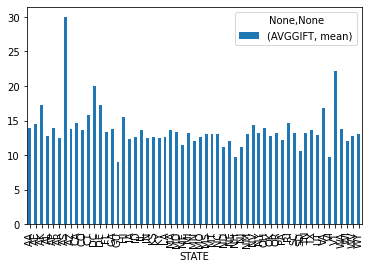

In [72]:
data_avg_.plot.bar(x=None, y=0)

<AxesSubplot:xlabel='(AVGGIFT, count)'>

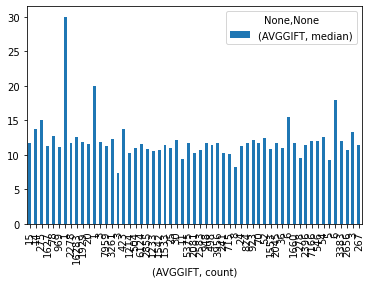

In [75]:
data_avg_.plot.bar(x=2, y=1)

<AxesSubplot:xlabel='STATE'>

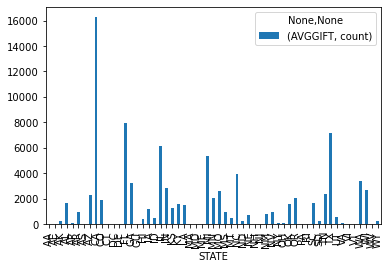

In [74]:
data_avg_.plot.bar(x=None, y=2)

## chi squared test

- looking for a correlation between categories

In [76]:
from scipy.stats import chi2_contingency

In [80]:
data_crosstab=pd.crosstab(d_cat['HOMEOWNR'], d_cat['RFA_2'], margins=False)

In [82]:
data_crosstab

RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G
HOMEOWNR,,,,,,,,,,,,,,
,1009,6727,2882,1010,2351,1087,508,1615,759,354,1079,894,534,241
H,2522,16179,6771,2596,5800,2413,1184,3970,1838,776,2276,1901,980,440
U,1136,6300,2354,1075,2247,910,575,1659,755,295,1094,852,437,183


In [81]:
chi2_contingency(data_crosstab, correction=False) # ignore the array, just first 3

(175.3605988661588,
 4.1538789000941835e-24,
 26,
 array([[ 1084.71369579,  6788.11831994,  2790.6915246 ,  1087.96760445,
          2416.72445014,  1024.98122957,   526.90078173,  1683.66531225,
           779.07870329,   331.20141772,  1034.04568943,   847.64320731,
           453.45541472,   200.81264906],
        [ 2558.27535112, 16009.6400053 ,  6581.78961664,  2565.94962901,
          5699.79582192,  2417.39753555,  1242.68485558,  3970.8906457 ,
          1837.4413921 ,   781.13185673,  2438.77588111,  1999.14939051,
          1069.46544033,   473.61257839],
        [ 1024.0109531 ,  6408.24167476,  2634.51885876,  1027.08276654,
          2281.47972794,   967.62123487,   497.41436269,  1589.44404205,
           735.4799046 ,   312.66672555,   976.17842947,   800.20740217,
           428.07914495,   189.57477255]]))

In [ ]:
# this returns 4 results in this order
# (chi-square statistics
# p value,
# degrees of freedom,
# expected of frequencies matrix)